# Generate new images using trained Progressive GAN models

## Loading trained model into the notebook

Below we copy the files from training on Cloud ML Engine onto the local filesystem of the kernel.

In [1]:
import os

os.environ['BUCKET'] = 'celeba-progressive-gan'
os.environ['MODEL_DIR'] = 'models/20210426152851/gen'

In [2]:
%%bash

mkdir -p ./savedmodel/
gsutil cp -r gs://${BUCKET}/${MODEL_DIR}/* ./savedmodel/

Copying gs://celeba-progressive-gan/models/20210426152851/gen/saved_model.pb...
/ [1 files][747.1 KiB/747.1 KiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying gs://celeba-progressive-gan/models/20210426152851/gen/variables/variables.data-00000-of-00001...
Copying gs://celeba-progressive-gan/models/20210426152851/gen/variables/variables.index...
/ [3 files][ 61.8 MiB/ 61.8 MiB]                                                
Operation completed over 3 objects/61.8 MiB.                                     


Next we load the generator model into the notebook so we can generate new images with the trained weights.

In [3]:
import sys

sys.path.append('./progan')

In [4]:
from trainer import model

In [5]:
import tensorflow as tf

G = tf.keras.models.load_model('./savedmodel/', custom_objects={'G': model.G})

In [6]:
# Use this cell to determine if the model was loaded correctly.

G.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
latents_in (InputLayer)         [(None, 512)]        0                                            
__________________________________________________________________________________________________
G_dense_head (Dense)            (None, 8192)         4194304     latents_in[0][0]                 
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 8192)         0           G_dense_head[0][0]               
__________________________________________________________________________________________________
tf_op_layer_Reshape (TensorFlow (None, 4, 4, 512)    0           lambda[0][0]                     
_______________________________________________________________________________________

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_generated_images(G,
                          latent_size,
                          n_to_show=20,
                          n_rows=5,
                          figsize=(8, 10),
                          alpha=1.0):
  """Plot images made by a generator."""
  latents_in = np.random.normal(size=(n_to_show, latent_size))
  X_gen = G.predict(latents_in)
  
  fig = plt.figure(figsize=(8, 10))

  for i, x in enumerate(X_gen):
    ax = fig.add_subplot(n_rows, n_to_show // n_rows, i + 1)
    ax.axis('off')
    ax.imshow(np.clip(np.array(x).squeeze(), 0.0, 1.0),
              interpolation='antialiased')

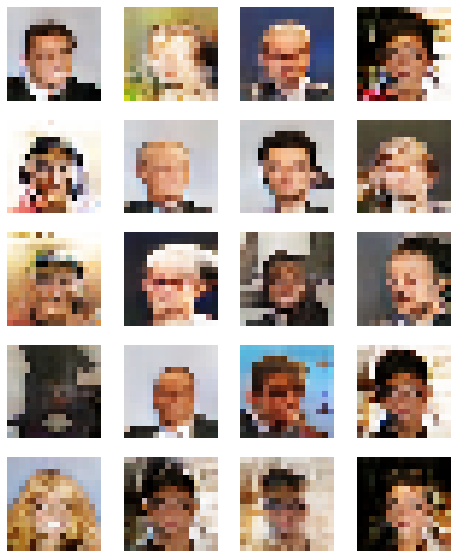

In [11]:
plot_generated_images(G, latent_size=512)